# Model 3.1 and 3.2: Logistic Regression (Ridge and Lasso penalty)

## Import the libraries and dataset

In [1]:
### Importing the libraries
import numpy as np
import pandas as pd
#from sklearnex import patch_sklearn



#patch_sklearn()

#plotting lib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Sklearn Lib metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold

# Pipelines : 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Missing values : 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer, SimpleImputer
import missingno as msno

#Dummy
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn. preprocessing import StandardScaler


pd.set_option("display.max_columns",None)

## Loading the dataset

In [7]:
train_df = pd.read_csv("Data/train.csv")
test_df = pd.read_csv("Data/test.csv")

#Test with a new processing data :
train_df2 = pd.read_csv("processed_train.csv")
test_df2 = pd.read_csv("processed_test.csv")
display(train_df2.head())
train_df.head()

,Unnamed: 0,occ_code_level2,age,stock_dividends,mig_chg_msa,tax_filer_stat,det_hh_summ,mig_prev_sunbelt,hisp_origin,education,wage_per_hour,capital_losses,own_or_self,country_self,mig_move_reg,high_income,hs_college,class_worker,mig_same,unemp_reason,ind_code_level2,race,country_mother,capital_gains,sex,citizenship,union_member,fam_under_18,marital_stat,region_prev_res,mig_chg_reg,country_father,occ_code_level1,full_or_part_emp,weeks_worked,det_hh_fam_stat,num_emp,vet_benefits
0,0,0.000000,3.761200,0.0,NaN,Nonfiler,Householder,NaN,All other,11th grade,0.0,NaN,0.000000,United-States,NaN,0,Not in universe,Not in universe,Not in universe under 1 year old,Not in universe,0.000000,Black,United-States,0.0,Female,Native- Born in the United States,Not in universe,Not in universe,NaN,Not in universe,NaN,United-States,Not in universe,Not in labor force,0.0,Householder,0.000000,2
1,1,2.944439,4.043051,NaN,NaN,NaN,Householder,NaN,All other,High school graduate,0.0,NaN,1.098612,United-States,NaN,1,Not in universe,Self-employed,Not in universe under 1 year old,NaN,3.496508,NaN,United-States,NaN,Male,Native- Born in the United States,Not in universe,Not in universe,Married-civilian spouse present,Not in universe,NaN,United-States,Sales,Full-time schedules,NaN,Householder,0.693147,2
2,2,3.295837,3.295837,NaN,NaN,Joint both under 65,Householder,NaN,All other,High school graduate,0.0,NaN,0.000000,Abroad,NaN,0,Not in universe,Private,Not in universe under 1 year old,NaN,3.737670,NaN,Abroad,NaN,NaN,Foreign born- Not a citizen of U S,Not in universe,Not in universe,NaN,Not in universe,NaN,Abroad,Adm support including clerical,Full-time schedules,NaN,Householder,1.386294,2
3,3,0.000000,4.219508,NaN,MSA to MSA,Joint one under 65 & one 65+,Householder,No,All other,NaN,0.0,NaN,0.000000,United-States,Same county,0,Not in universe,Not in universe,No,NaN,0.000000,Black,United-States,0.0,NaN,Native- Born in the United States,Not in universe,Not in universe,NaN,Northeast,Same county,United-States,Not in universe,Children or Armed Forces,0.0,Householder,0.000000,1
4,4,0.000000,NaN,NaN,Nonmover,Nonfiler,Child under 18 never married,Not in universe,All other,Children,0.0,0.0,0.000000,United-States,Nonmover,0,Not in universe,Not in universe,Yes,Not in universe,0.000000,White,United-States,0.0,Female,Native- Born in the United States,Not in universe,Mother only present,NaN,Not in universe,Nonmover,United-States,Not in universe,Children or Armed Forces,NaN,Child <18,0.000000,0


,id,occ_code_level2,age,stock_dividends,mig_chg_msa,tax_filer_stat,det_hh_summ,mig_prev_sunbelt,hisp_origin,education,wage_per_hour,capital_losses,vet_question,own_or_self,country_self,mig_move_reg,high_income,hs_college,class_worker,mig_same,unemp_reason,state_prev_res,ind_code_level2,race,country_mother,capital_gains,sex,ind_code_level1,citizenship,union_member,fam_under_18,marital_stat,region_prev_res,mig_chg_reg,country_father,occ_code_level1,full_or_part_emp,weeks_worked,det_hh_fam_stat,num_emp,vet_benefits
0,1,0,42.0,0.0,NaN,Nonfiler,Householder,NaN,All other,11th grade,0.0,NaN,Not in universe,0,United-States,NaN,0,Not in universe,Not in universe,Not in universe under 1 year old,Not in universe,Not in universe,0,Black,United-States,0.0,Female,Not in universe or children,Native- Born in the United States,Not in universe,Not in universe,NaN,Not in universe,NaN,United-States,Not in universe,Not in labor force,0.0,Householder,0,2
1,2,18,56.0,NaN,NaN,NaN,Householder,NaN,All other,High school graduate,0.0,NaN,Not in universe,2,United-States,NaN,1,Not in universe,Self-employed-incorporated,Not in universe under 1 year old,NaN,Not in universe,32,NaN,United-States,NaN,Male,Wholesale trade,Native- Born in the United States,Not in universe,Not in universe,Married-civilian spouse present,Not in universe,NaN,United-States,Sales,Full-time schedules,NaN,Householder,1,2
2,3,26,26.0,NaN,NaN,Joint both under 65,Householder,NaN,All other,High school graduate,0.0,NaN,Not in universe,0,Haiti,NaN,0,Not in universe,Private,Not in universe under 1 year old,NaN,Not in universe,41,NaN,Haiti,NaN,NaN,Hospital services,Foreign born- Not a citizen of U S,Not in universe,Not in universe,NaN,Not in universe,NaN,Haiti,Adm support including clerical,Full-time schedules,NaN,Householder,3,2
3,4,0,67.0,NaN,MSA to MSA,Joint one under 65 & one 65+,Householder,No,All other,NaN,0.0,NaN,No,0,United-States,Same county,0,Not in universe,Not in universe,No,NaN,North Carolina,0,Black,United-States,0.0,NaN,Not in universe or children,Native- Born in the United States,Not in universe,Not in universe,NaN,Northeast,Same county,United-States,Not in universe,Children or Armed Forces,0.0,Householder,0,1
4,5,0,NaN,NaN,Nonmover,Nonfiler,Child under 18 never married,Not in universe,All other,Children,0.0,0.0,Not in universe,0,United-States,Nonmover,0,Not in universe,Not in universe,Yes,Not in universe,Not in universe,0,White,United-States,0.0,Female,Not in universe or children,Native- Born in the United States,Not in universe,Mother only present,NaN,Not in universe,Nonmover,United-States,Not in universe,Children or Armed Forces,NaN,Child <18 never marr not in subfamily,0,0


## Cleaning the dataset

In [8]:
#removing id for train_df
train_df.drop("id", axis = 1, inplace = True)
train_df2.drop("Unnamed: 0", axis = 1, inplace = True)

In [9]:
# Transforming object into categories 
# for train
for i in train_df.columns:
    if train_df[i].dtypes == "object":
        train_df[i] = train_df[i].astype("category")
# For test
for i in test_df.columns:
    if test_df[i].dtypes == "object":
        test_df[i] = test_df[i].astype("category")
        
        
# for train
for i in train_df2.columns:
    if train_df2[i].dtypes == "object":
        train_df2[i] = train_df2[i].astype("category")
# For test
for i in test_df2.columns:
    if test_df2[i].dtypes == "object":
        test_df2[i] = test_df2[i].astype("category")

In [10]:
### Splitting the data

In [11]:
X= train_df.drop("high_income", axis = 1)
y = train_df["high_income"]

X1= train_df2.drop("high_income", axis = 1)
y1 = train_df2["high_income"]

In [12]:
# Grouping our features that are categories in one vector
# Same for numeric

categorical_features = [i for i in X.columns if X[i].dtype.name == "category"]
numerical_features = [i for i in X.columns if X[i].dtype.name != "category"]

## Logistic Regression: baseline model in order to know which imputation method to use inside the pipeline (Mean, Median, Constant, Most frequent ). We will One hot encode categorical variables to create dummy variables and scale numerical variables using standard scaler.

In [14]:
### What is the best imputaiton method ? let's try some and evaluate using cross-validation
logi_res = {}
for i in ("mean","median"):
    
    numeric_transformer = Pipeline(
        steps=[("imputer_num", SimpleImputer(strategy=i)), ("scaler", StandardScaler())]
    )
    for j in ("most_frequent","constant"):
        if j == "most_frequent" : 
            categorical_transformer = Pipeline(
                steps=[("imputer_cat", SimpleImputer(strategy=j)),
                       ("encoder" , OneHotEncoder(handle_unknown="ignore", sparse=False))]
            )

            preprocessor = ColumnTransformer(
                transformers=[
                    ("num", numeric_transformer, numerical_features),
                    ("cat", categorical_transformer, categorical_features),
                ]
            )

            # Append classifier to preprocessing pipeline.
            # Now we have a full prediction pipeline.
            clf = Pipeline(
                steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
            )
            score = cross_val_score(clf, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=1),scoring = "accuracy",n_jobs = -1, verbose=2).mean()
            logi_res[(i,j)] = score
        else : 
            categorical_transformer = Pipeline(
                steps=[("imputer_cat", SimpleImputer(strategy=j)),
                       ("encoder" , OneHotEncoder(handle_unknown="ignore", sparse=False))]
            )

            preprocessor = ColumnTransformer(
                transformers=[
                    ("num", numeric_transformer, numerical_features),
                    ("cat", categorical_transformer, categorical_features),
                ]
            )

            # Append classifier to preprocessing pipeline.
            # Now we have a full prediction pipeline.
            clf = Pipeline(
                steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
            )
            score = cross_val_score(clf, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=1),scoring = "accuracy",n_jobs = -1, verbose=2).mean()
            logi_res[(i,j)] = score


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/Users/adrien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/adrien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solve

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/Users/adrien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/adrien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solve

In [15]:
# Baseline original model
logi_res
# For this model, using the mean and constant seems to be the best approach. LEt's use a grid search with this imputation method

{('mean', 'most_frequent'): 0.8556228119711304,
 ('mean', 'constant'): 0.856868095703087,
 ('median', 'most_frequent'): 0.8550368403828994,
 ('median', 'constant'): 0.856428585573061}

In [23]:
#Testing with the new data set that was created
categorical_features2 = [i for i in X1.columns if X1[i].dtype.name == "category"]
numerical_features2 = [i for i in X1.columns if X1[i].dtype.name != "category"]
ordinal = ["education", "hs_college", "class_worker", "full_or_part_emp"]
categorical_features2.remove("education")
categorical_features2.remove("hs_college")
categorical_features2.remove("class_worker")
categorical_features2.remove("full_or_part_emp")

order_educ = ["Missing",'Children',
    'Less than 1st grade',
    '1st 2nd 3rd or 4th grade',
    '5th or 6th grade',
    '7th and 8th grade',
    '9th grade',
    '10th grade',
    '11th grade',
    '12th grade no diploma',
    'High school graduate',
    'Associates degree-occup /vocational',
    'Associates degree-academic program',
    'Some college but no degree',
    'Bachelors degree(BA AB BS)',
    'Masters degree(MA MS MEng MEd MSW MBA)',
    'Prof school degree (MD DDS DVM LLB JD)',
    'Doctorate degree(PhD EdD)']

order_hs_college = ["Missing",
                    "Not in universe", 
                    "High school", 
                    "College or university"]

order_class_worker = ['Not in universe',
                      'Never worked',
                      'Without pay',
                      'Self-employed',
                      'Government',
                      'Private']                      

order_full_or_part_emp = ['Not in labor force', 
                          'Children or Armed Forces',
                          'Unemployed full-time',
                          'Unemployed part- time',
                          'PT for econ reasons usually PT',
                          'PT for econ reasons usually FT',
                          'PT for non-econ reasons usually FT',
                          'Full-time schedules']

logi_res = {}

for i in ("mean","median"):
    
    numeric_transformer2 = Pipeline(
        steps=[("imputer_num", SimpleImputer(strategy=i)), ("scaler", StandardScaler())]
    )
    for j in ("most_frequent","constant"):
        if j == "most_frequent" : 
            categorical_transformer2 = Pipeline(
                steps=[("imputer_cat", SimpleImputer(strategy=j)),
                       ("encoder" , OneHotEncoder(handle_unknown="ignore", sparse=False))]
            )
            
            ordinal_transfomer = Pipeline(
            steps=[("imputer_ord", SimpleImputer(strategy="constant", fill_value= "Missing")), 
           #filling in missing value as "Missing" in the ordinal code and unknown value as -1
          ("ordinal_enc",OrdinalEncoder(categories=[order_educ, order_hs_college, order_class_worker, order_full_or_part_emp], handle_unknown="use_encoded_value", unknown_value = -1)),
          ("scaler2", StandardScaler())])

            preprocessor = ColumnTransformer(
                transformers=[
                    ("num", numeric_transformer2, numerical_features2),
                    ("cat", categorical_transformer2, categorical_features2),
                    ("ord",ordinal_transfomer,ordinal)
                    
                ]
            )

            # Append classifier to preprocessing pipeline.
            # Now we have a full prediction pipeline.
            clf = Pipeline(
                steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
            )
            score = cross_val_score(clf, X1, y1, cv=KFold(n_splits=5, shuffle=True, random_state=1),scoring = "accuracy",n_jobs = -1, verbose=2).mean()
            logi_res[(i,j)] = score
        else : 
            categorical_transformer2 = Pipeline(
                steps=[("imputer_cat", SimpleImputer(strategy=j)),
                       ("encoder" , OneHotEncoder(handle_unknown="ignore", sparse=False))]
            )
            
            ordinal_transfomer = Pipeline(
            steps=[("imputer_ord", SimpleImputer(strategy="constant", fill_value= "Missing")), 
           #filling in missing value as "Missing" in the ordinal code and unknown value as -1
          ("ordinal_enc",OrdinalEncoder(categories=[order_educ, order_hs_college, order_class_worker, order_full_or_part_emp], handle_unknown="use_encoded_value", unknown_value = -1)),
          ("scaler2", StandardScaler())])

            preprocessor = ColumnTransformer(
                transformers=[
                    ("num", numeric_transformer2, numerical_features2),
                    ("cat", categorical_transformer2, categorical_features2),
                    ("ord",ordinal_transfomer,ordinal)
                    
                ]
            )

            # Append classifier to preprocessing pipeline.
            # Now we have a full prediction pipeline.
            clf = Pipeline(
                steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
            )
            score = cross_val_score(clf, X1, y1, cv=KFold(n_splits=5, shuffle=True, random_state=1),scoring = "accuracy",n_jobs = -2,verbose=2).mean()
            logi_res[(i,j)] = score


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/Users/adrien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/adrien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solve

[CV] END .................................................... total time=   4.5s
[CV] END .................................................... total time=   3.4s
[CV] END .................................................... total time=   4.3s
[CV] END .................................................... total time=   2.4s
[CV] END .................................................... total time=   3.8s
[CV] END .................................................... total time=   2.9s
[CV] END .................................................... total time=   3.6s
[CV] END .................................................... total time=   2.4s
[CV] END .................................................... total time=   3.1s
[CV] END .................................................... total time=   2.3s
[CV] END .................................................... total time=   3.8s
[CV] END .................................................... total time=   3.4s
[CV] END ...................

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
/Users/adrien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/adrien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solve

[CV] END .................................................... total time=   4.5s
[CV] END .................................................... total time=   2.3s
[CV] END .................................................... total time=   3.4s
[CV] END .................................................... total time=   3.3s
[CV] END .................................................... total time=   4.3s
[CV] END .................................................... total time=   3.9s
[CV] END .................................................... total time=   2.8s
[CV] END .................................................... total time=   3.7s
[CV] END .................................................... total time=   3.2s
[CV] END .................................................... total time=   3.7s
[CV] END .................................................... total time=   3.4s
[CV] END .................................................... total time=   3.5s
[CV] END ...................

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
/Users/adrien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/adrien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solve

In [24]:
### Baseline using the processed dataset
logi_res

{('mean', 'most_frequent'): 0.8439028134687934,
 ('mean', 'constant'): 0.8453677768125166,
 ('median', 'most_frequent'): 0.844177480053054,
 ('median', 'constant'): 0.8459537903192178}

[CV] END .................................................... total time=   2.8s
[CV] END .................................................... total time=   4.3s
[CV] END .................................................... total time=   2.3s
[CV] END .................................................... total time=   3.5s
[CV] END .................................................... total time=   2.4s
[CV] END .................................................... total time=   3.3s
[CV] END .................................................... total time=   4.0s
[CV] END .................................................... total time=   3.4s
[CV] END .................................................... total time=   2.4s
[CV] END .................................................... total time=   3.5s
[CV] END .................................................... total time=   2.3s
[CV] END .................................................... total time=   4.4s
[CV] END ...................

### It seems that the original dataset performs better than the processed dataset (reducing using the logistic regression as a baseline model. Indeed, the best score using the processed dataset we have built is around 0.8459 accuracy while the one using the original dataset yield an accuracy score of around 0.8568. For this reason we will consider working on the original dataset since processing it by regrouping some categories together didn't seem to improve the predictions. Furthermore it looks like the mean (for numerical) and constant imputation (for categories) works the best. This is why we will decide for all our models to use the mean imputation for numerical variables and a constant imputation for categorical variables.

## Defining the correct pipeline using mean imputation and standard scaller for numerical variables and imputing by a constant then using one hot encoder to create dummy variables for the categorical variables

### Starting using the L1 pernalty (Lasso)

In [13]:

numeric_transformer = Pipeline(
    steps=[("imputer_num", SimpleImputer(strategy="mean")),
           ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[("imputer_cat", SimpleImputer(strategy="constant", fill_value="Missing")),
           
           ("encoder" , OneHotEncoder(handle_unknown="ignore", sparse=False))]
)



preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(C = 1, penalty = "l1", solver = "saga", tol = 0.1, random_state = 10))]
)


set_config(display="diagram")
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['occ_code_level2', 'age',
                                                   'stock_dividends',
                                                   'wage_per_hour',
                                                   'capital_losses',
                                                   'own_or_self',
                                                   'ind_code_level2',
                                                   'capital_gains',
                                                   'weeks_worked', 'num_emp',
                                                   'vet_benefits']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_ca...
                                                   'class_worker', 'mig_same',
                                                   'unemp_reason',
                                                   'state_prev_res', 'race',
                                                   'country_mother', 'sex',
                                                   'ind_code_level1',
                                                   'citizenship',
                                                   'union_member',
                                                   'fam_under_18',
                                                   'marital_stat',
                                                   'region_prev_res',
                                                   'mig_chg_reg',
                                                   'country_father',
                                                   'occ_code_level1',
                                                   'full_or_part_emp',
                                                   'det_hh_fam_stat'])])),
                ('classifier',
                 LogisticRegression(C=1, penalty='l1', random_state=10,
                                    solver='saga', tol=0.1))])

## GridSearch:

In [14]:
hyper_param = {"classifier__C": 10 ** np.linspace(-2, 0, 100)}
logi_pipe_cv = GridSearchCV(estimator = clf,param_grid=hyper_param, scoring="accuracy",
                           cv = KFold(n_splits=5, shuffle=True, random_state=1), n_jobs=-1, verbose=1)

In [15]:
logi_pipe_cv.fit(X,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['occ_code_level2',
                                                                          'age',
                                                                          'stock_dividends',
                                                                          'wage_per_hour',
                                                                          'capital_losses',
                                                                          'own_or_self',
                                                                          'ind_code_level2',
                                                                          'capital_gains',
                                                                          'week...
       0.25950242, 0.27185882, 0.28480359, 0.29836472, 0.31257158,
       0.32745492, 0.34304693, 0.35938137, 0.37649358, 0.39442061,
       0.41320124, 0.43287613, 0.45348785, 0.47508102, 0.49770236,
       0.52140083, 0.54622772, 0.57223677, 0.59948425, 0.62802914,
       0.65793322, 0.68926121, 0.7220809 , 0.75646333, 0.7924829 ,
       0.83021757, 0.869749  , 0.91116276, 0.95454846, 1.        ])},
             scoring='accuracy', verbose=1)

In [16]:
pd.DataFrame(logi_pipe_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.844396,0.369581,0.226525,0.012851,0.01,{'classifier__C': 0.01},0.849478,0.847372,0.840857,0.847358,0.845527,0.846119,0.002913,100
1,2.991977,0.066260,0.226465,0.004784,0.010476,{'classifier__C': 0.010476157527896646},0.849753,0.848288,0.841315,0.847633,0.845344,0.846466,0.002942,99
2,2.959297,0.056071,0.237835,0.001896,0.010975,{'classifier__C': 0.010974987654930561},0.849753,0.848746,0.842047,0.847816,0.845435,0.846759,0.002756,98
3,3.223491,0.120978,0.243962,0.004421,0.011498,{'classifier__C': 0.011497569953977356},0.850119,0.848837,0.841956,0.848274,0.845893,0.847016,0.002877,97
4,3.300353,0.273696,0.249776,0.008742,0.012045,{'classifier__C': 0.012045035402587823},0.851309,0.848837,0.842139,0.848366,0.845893,0.847309,0.003104,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.171239,0.125776,0.287041,0.010220,0.830218,{'classifier__C': 0.8302175681319748},0.857077,0.853232,0.850197,0.855325,0.851021,0.853370,0.002576,18
96,4.064975,0.069312,0.283071,0.004149,0.869749,{'classifier__C': 0.8697490026177834},0.857077,0.853232,0.850105,0.855325,0.851021,0.853352,0.002598,27
97,3.993565,0.019431,0.282584,0.006436,0.911163,{'classifier__C': 0.9111627561154896},0.857077,0.853324,0.850197,0.855233,0.851113,0.853389,0.002545,15
98,4.103480,0.129845,0.304885,0.028586,0.954548,{'classifier__C': 0.9545484566618342},0.857077,0.853324,0.850105,0.855233,0.851113,0.853370,0.002568,25


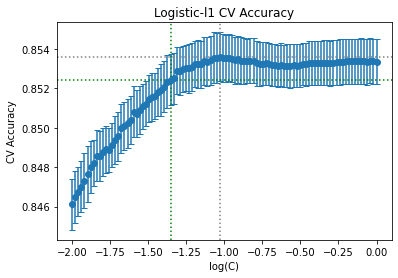

In [17]:
# Plot results of cross-validation
cv_res = logi_pipe_cv
grid = 10 ** np.linspace(-2, 0, 100)
mean_scores = cv_res.cv_results_["mean_test_score"]
se_scores = cv_res.cv_results_["std_test_score"] / np.sqrt(5) # ! very important to divide by sqrt(# folds)
params = cv_res.cv_results_["param_classifier__C"].data

best_index = np.argmax(mean_scores)

one_se_best_param = np.min(
    grid[mean_scores >= mean_scores[best_index] - se_scores[best_index]]
)

one_se_score = mean_scores[grid == one_se_best_param][0]

# just for reference, we also plot the parameter that maximizes the cross-validated accuracy
best_param = cv_res.best_params_["classifier__C"] 
best_score = cv_res.best_score_

plt.errorbar(x=np.log10(grid), y=mean_scores, yerr=se_scores, fmt="o", capsize=3)

plt.axvline(
    np.log10(best_param), ls="dotted", color="grey"
)  # vertical line at the parameter value yielding highest accuracty
plt.axhline(
    best_score, ls="dotted", color="grey"
)  # horizontal line at highest accuracy
plt.axvline(
    np.log10(one_se_best_param), ls="dotted", color="green"
)  # vertical line at the parameter corresponding to 1-se
plt.axhline(
    one_se_score, ls="dotted", color="green"
)  # horizontal line at corresponding to 1-se parameter

plt.title("Logistic-l1 CV Accuracy")
plt.xlabel("log(C)")
plt.ylabel("CV Accuracy")
plt.show()

In [18]:
cv_res = logi_pipe_cv
cv_res.best_params_

{'classifier__C': 0.093260334688322}

### One standard error rule : 

In [21]:
one_se_best_param 
cv_res_lasso =pd.DataFrame(logi_pipe_cv.cv_results_)
cv_res_lasso[cv_res_lasso["param_classifier__C"] == one_se_best_param ]
# Best param according to one ste rule

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
32,3.83781,0.312147,0.296449,0.00748,0.044306,{'classifier__C': 0.044306214575838825},0.855796,0.853598,0.848915,0.854867,0.849007,0.852436,0.002923,68


In [20]:
clf.set_params(classifier__C = one_se_best_param, classifier__penalty = "l1")

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['occ_code_level2', 'age',
                                                   'stock_dividends',
                                                   'wage_per_hour',
                                                   'capital_losses',
                                                   'own_or_self',
                                                   'ind_code_level2',
                                                   'capital_gains',
                                                   'weeks_worked', 'num_emp',
                                                   'vet_benefits']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_ca...
                                                   'unemp_reason',
                                                   'state_prev_res', 'race',
                                                   'country_mother', 'sex',
                                                   'ind_code_level1',
                                                   'citizenship',
                                                   'union_member',
                                                   'fam_under_18',
                                                   'marital_stat',
                                                   'region_prev_res',
                                                   'mig_chg_reg',
                                                   'country_father',
                                                   'occ_code_level1',
                                                   'full_or_part_emp',
                                                   'det_hh_fam_stat'])])),
                ('classifier',
                 LogisticRegression(C=0.044306214575838825, penalty='l1',
                                    random_state=10, solver='saga', tol=0.1))])

In [21]:
clf.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['occ_code_level2', 'age',
                                                   'stock_dividends',
                                                   'wage_per_hour',
                                                   'capital_losses',
                                                   'own_or_self',
                                                   'ind_code_level2',
                                                   'capital_gains',
                                                   'weeks_worked', 'num_emp',
                                                   'vet_benefits']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_ca...
                                                   'unemp_reason',
                                                   'state_prev_res', 'race',
                                                   'country_mother', 'sex',
                                                   'ind_code_level1',
                                                   'citizenship',
                                                   'union_member',
                                                   'fam_under_18',
                                                   'marital_stat',
                                                   'region_prev_res',
                                                   'mig_chg_reg',
                                                   'country_father',
                                                   'occ_code_level1',
                                                   'full_or_part_emp',
                                                   'det_hh_fam_stat'])])),
                ('classifier',
                 LogisticRegression(C=0.044306214575838825, penalty='l1',
                                    random_state=10, solver='saga', tol=0.1))])

In [22]:
y_pred_train = clf.predict(X)
acc = accuracy_score(y, y_pred_train)
print("Logistic using C = 0.044306214575838825, penalty='l1', random_state=10,solver='saga', tol=0.1 =  --- Accuracy on training:", acc)

Logistic using C = 0.044306214575838825, penalty='l1', random_state=10,solver='saga', tol=0.1 =  --- Accuracy on training: 0.8541578918453678


In [51]:
import warnings
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [52]:
get_feature_names(preprocessor)

/var/folders/r3/t8xp3_0d2qg9znqckxzmdc2w0000gp/T/ipykernel_11829/3468659548.py:31: UserWarning: Transformer imputer_num (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
/var/folders/r3/t8xp3_0d2qg9znqckxzmdc2w0000gp/T/ipykernel_11829/3468659548.py:31: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
/var/folders/r3/t8xp3_0d2qg9znqckxzmdc2w0000gp/T/ipykernel_11829/3468659548.py:31: UserWarning: Transformer imputer_cat (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


['num__occ_code_level2',
 'num__age',
 'num__stock_dividends',
 'num__wage_per_hour',
 'num__capital_losses',
 'num__own_or_self',
 'num__ind_code_level2',
 'num__capital_gains',
 'num__weeks_worked',
 'num__num_emp',
 'num__vet_benefits',
 'encoder__x0_Abroad to MSA',
 'encoder__x0_Abroad to nonMSA',
 'encoder__x0_MSA to MSA',
 'encoder__x0_MSA to nonMSA',
 'encoder__x0_Missing',
 'encoder__x0_NonMSA to MSA',
 'encoder__x0_NonMSA to nonMSA',
 'encoder__x0_Nonmover',
 'encoder__x0_Not identifiable',
 'encoder__x0_Not in universe',
 'encoder__x1_Head of household',
 'encoder__x1_Joint both 65+',
 'encoder__x1_Joint both under 65',
 'encoder__x1_Joint one under 65 & one 65+',
 'encoder__x1_Missing',
 'encoder__x1_Nonfiler',
 'encoder__x1_Single',
 'encoder__x2_Child 18 or older',
 'encoder__x2_Child under 18 ever married',
 'encoder__x2_Child under 18 never married',
 'encoder__x2_Group Quarters- Secondary individual',
 'encoder__x2_Householder',
 'encoder__x2_Nonrelative of householder'

In [60]:
# Now that we have our model let's test it on the test data but first we need to remove the id column and keep it
test_id = test_df[["id"]]
test_df.drop("id",axis = 1, inplace = True)

In [61]:
y_test_pred = clf.predict(test_df)
y_test_pred[0:5]

array([0, 0, 0, 1, 0])

In [62]:
test_id["high_income"] = y_test_pred

<ipython-input-62-f149247ded18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_id["high_income"] = y_test_pred


In [63]:
test_id

,id,high_income
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0
...,...,...
6063,6064,0
6064,6065,1
6065,6066,0
6066,6067,0


In [68]:
test_id.to_csv("Predictions/Logisticl1_prediction.csv",index = False, header=True)

## L2 penalty :

In [8]:

numeric_transformer = Pipeline(
    steps=[("imputer_num", SimpleImputer(strategy="mean")),
           ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[("imputer_cat", SimpleImputer(strategy="constant", fill_value="Missing")),
           ("encoder" , OneHotEncoder(handle_unknown="ignore", sparse=False))]
)



preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(C = 1, penalty = "l2", solver = "saga", tol = 0.01, random_state = 10))]
)


set_config(display="diagram")
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['occ_code_level2', 'age',
                                                   'stock_dividends',
                                                   'wage_per_hour',
                                                   'capital_losses',
                                                   'own_or_self',
                                                   'ind_code_level2',
                                                   'capital_gains',
                                                   'weeks_worked', 'num_emp',
                                                   'vet_benefits']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_ca...
                                                   'class_worker', 'mig_same',
                                                   'unemp_reason',
                                                   'state_prev_res', 'race',
                                                   'country_mother', 'sex',
                                                   'ind_code_level1',
                                                   'citizenship',
                                                   'union_member',
                                                   'fam_under_18',
                                                   'marital_stat',
                                                   'region_prev_res',
                                                   'mig_chg_reg',
                                                   'country_father',
                                                   'occ_code_level1',
                                                   'full_or_part_emp',
                                                   'det_hh_fam_stat'])])),
                ('classifier',
                 LogisticRegression(C=1, random_state=10, solver='saga',
                                    tol=0.01))])

### GridSearch:

In [9]:
hyper_param = {"classifier__C": 10 ** np.linspace(-2, 0, 50)}
logi_pipe_cv = GridSearchCV(estimator = clf,param_grid=hyper_param, scoring="accuracy",
                           cv = KFold(n_splits=5, shuffle=True, random_state=1), n_jobs=-1, verbose=1)

In [10]:
logi_pipe_cv.fit(X,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 15.9min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['occ_code_level2',
                                                                          'age',
                                                                          'stock_dividends',
                                                                          'wage_per_hour',
                                                                          'capital_losses',
                                                                          'own_or_self',
                                                                          'ind_code_level2',
                                                                          'capital_gains',
                                                                          'week...
       0.06551286, 0.07196857, 0.07906043, 0.08685114, 0.09540955,
       0.10481131, 0.11513954, 0.12648552, 0.13894955, 0.1526418 ,
       0.16768329, 0.184207  , 0.20235896, 0.22229965, 0.24420531,
       0.26826958, 0.29470517, 0.32374575, 0.35564803, 0.39069399,
       0.42919343, 0.47148664, 0.51794747, 0.5689866 , 0.62505519,
       0.68664885, 0.75431201, 0.82864277, 0.91029818, 1.        ])},
             scoring='accuracy', verbose=1)

In [12]:
pd.DataFrame(logi_pipe_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.112916,0.231222,0.230573,0.016371,0.01,{'classifier__C': 0.01},0.857444,0.854148,0.850014,0.854134,0.852120,0.853572,0.002466,50
1,6.709549,0.201750,0.227451,0.009843,0.010985,{'classifier__C': 0.010985411419875584},0.857718,0.854331,0.850563,0.854684,0.852028,0.853865,0.002450,49
2,7.230454,0.261300,0.233546,0.003129,0.012068,{'classifier__C': 0.012067926406393288},0.857627,0.854605,0.850746,0.854958,0.852394,0.854066,0.002349,48
3,7.990786,0.146027,0.240961,0.007829,0.013257,{'classifier__C': 0.013257113655901088},0.858085,0.854605,0.851479,0.855782,0.852852,0.854561,0.002295,47
4,8.463998,0.246309,0.249581,0.004024,0.014563,{'classifier__C': 0.014563484775012436},0.858176,0.854697,0.851479,0.855691,0.853127,0.854634,0.002276,46
5,9.073962,0.219079,0.258766,0.007910,0.015999,{'classifier__C': 0.015998587196060583},0.858268,0.854422,0.852028,0.856057,0.852852,0.854726,0.002245,44
6,9.538052,0.287478,0.272705,0.021264,0.017575,{'classifier__C': 0.017575106248547922},0.858176,0.855063,0.852120,0.855599,0.853035,0.854799,0.002117,43
7,10.048689,0.074397,0.277686,0.020753,0.019307,{'classifier__C': 0.019306977288832496},0.858451,0.855521,0.851937,0.855508,0.852944,0.854872,0.002279,42
8,12.115681,0.518788,0.343439,0.073519,0.02121,{'classifier__C': 0.021209508879201904},0.858176,0.855429,0.852120,0.855416,0.852486,0.854726,0.002222,45
9,13.742464,0.998703,0.290046,0.008606,0.0233,{'classifier__C': 0.023299518105153717},0.858085,0.855796,0.852486,0.855874,0.852578,0.854964,0.002149,41


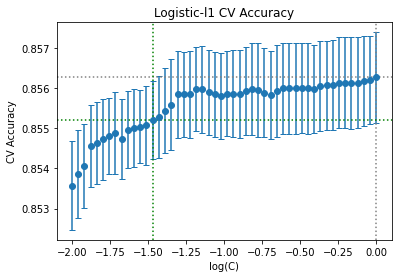

In [13]:
# Plot results of cross-validation
cv_res = logi_pipe_cv
grid = 10 ** np.linspace(-2, 0, 50)
mean_scores = cv_res.cv_results_["mean_test_score"]
se_scores = cv_res.cv_results_["std_test_score"] / np.sqrt(5) # ! very important to divide by sqrt(# folds)
params = cv_res.cv_results_["param_classifier__C"].data

best_index = np.argmax(mean_scores)

one_se_best_param = np.min(
    grid[mean_scores >= mean_scores[best_index] - se_scores[best_index]]
)

one_se_score = mean_scores[grid == one_se_best_param][0]

# just for reference, we also plot the parameter that maximizes the cross-validated accuracy
best_param = cv_res.best_params_["classifier__C"] 
best_score = cv_res.best_score_

plt.errorbar(x=np.log10(grid), y=mean_scores, yerr=se_scores, fmt="o", capsize=3)

plt.axvline(
    np.log10(best_param), ls="dotted", color="grey"
)  # vertical line at the parameter value yielding highest accuracty
plt.axhline(
    best_score, ls="dotted", color="grey"
)  # horizontal line at highest accuracy
plt.axvline(
    np.log10(one_se_best_param), ls="dotted", color="green"
)  # vertical line at the parameter corresponding to 1-se
plt.axhline(
    one_se_score, ls="dotted", color="green"
)  # horizontal line at corresponding to 1-se parameter

plt.title("Logistic-l1 CV Accuracy")
plt.xlabel("log(C)")
plt.ylabel("CV Accuracy")
plt.show()

In [14]:
one_se_best_param #One standard error 

0.03393221771895328

In [15]:
clf.set_params(classifier__C=one_se_best_param)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['occ_code_level2', 'age',
                                                   'stock_dividends',
                                                   'wage_per_hour',
                                                   'capital_losses',
                                                   'own_or_self',
                                                   'ind_code_level2',
                                                   'capital_gains',
                                                   'weeks_worked', 'num_emp',
                                                   'vet_benefits']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_ca...
                                                   'class_worker', 'mig_same',
                                                   'unemp_reason',
                                                   'state_prev_res', 'race',
                                                   'country_mother', 'sex',
                                                   'ind_code_level1',
                                                   'citizenship',
                                                   'union_member',
                                                   'fam_under_18',
                                                   'marital_stat',
                                                   'region_prev_res',
                                                   'mig_chg_reg',
                                                   'country_father',
                                                   'occ_code_level1',
                                                   'full_or_part_emp',
                                                   'det_hh_fam_stat'])])),
                ('classifier',
                 LogisticRegression(C=0.03393221771895328, random_state=10,
                                    solver='saga', tol=0.01))])

In [16]:
clf.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['occ_code_level2', 'age',
                                                   'stock_dividends',
                                                   'wage_per_hour',
                                                   'capital_losses',
                                                   'own_or_self',
                                                   'ind_code_level2',
                                                   'capital_gains',
                                                   'weeks_worked', 'num_emp',
                                                   'vet_benefits']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_ca...
                                                   'class_worker', 'mig_same',
                                                   'unemp_reason',
                                                   'state_prev_res', 'race',
                                                   'country_mother', 'sex',
                                                   'ind_code_level1',
                                                   'citizenship',
                                                   'union_member',
                                                   'fam_under_18',
                                                   'marital_stat',
                                                   'region_prev_res',
                                                   'mig_chg_reg',
                                                   'country_father',
                                                   'occ_code_level1',
                                                   'full_or_part_emp',
                                                   'det_hh_fam_stat'])])),
                ('classifier',
                 LogisticRegression(C=0.03393221771895328, random_state=10,
                                    solver='saga', tol=0.01))])

In [19]:
y_pred_train = clf.predict(X)
acc = accuracy_score(y, y_pred_train)
print("Logistic using C = 0.044306214575838825, penalty='l1', random_state=10,solver='saga', tol=0.1 =  --- Accuracy on training:", acc)

Logistic using C = 0.044306214575838825, penalty='l1', random_state=10,solver='saga', tol=0.1 =  --- Accuracy on training: 0.8568498544142692


In [20]:
# Now that we have our model let's test it on the test data but first we need to remove the id column and keep it
test_id = test_df[["id"]]
test_df.drop("id",axis = 1, inplace = True)

In [21]:
y_test_pred = clf.predict(test_df)
y_test_pred[0:5]

array([0, 0, 0, 1, 0])

In [22]:
test_id["high_income"] = y_test_pred

<ipython-input-22-f149247ded18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_id["high_income"] = y_test_pred


In [23]:
test_id.to_csv("Predictions/Logisticl2_prediction.csv",index = False, header=True)

In [51]:
#Trying using C=1 since it gives the best results
best_param

1.0

In [52]:
clf.set_params(classifier__C=best_param)
clf.fit(X,y)
y_pred_train = clf.predict(X)
acc = accuracy_score(y, y_pred_train)
print("Logistic using C = 0.044306214575838825, penalty='l1', random_state=10,solver='saga', tol=0.1 =  --- Accuracy on training:", acc)

Logistic using C = 0.044306214575838825, penalty='l1', random_state=10,solver='saga', tol=0.1 =  --- Accuracy on training: 0.8581317413518413


In [53]:
y_test_pred = clf.predict(test_df)
new_test_pred = test_id[["id"]]
new_test_pred["high_income"] = y_test_pred
y_test_pred[0:5]

array([0, 0, 0, 1, 0])

In [54]:
new_test_pred

,id,high_income
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0
...,...,...
6063,6064,0
6064,6065,1
6065,6066,0
6066,6067,0


In [58]:
new_test_pred.to_csv("Predictions/Logisticl2_C=1_No_oneStderrorRule_prediction.csv",index = False, header=True)


In [59]:
error = pd.read_csv("Predictions/Logisticl2_C=1_No_oneStderrorRule_prediction.csv")

## Trying other Gridsearch :

In [79]:

numeric_transformer = Pipeline(
    steps=[("imputer_num", SimpleImputer(strategy="mean")),
           ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[("imputer_cat", SimpleImputer(strategy="constant", fill_value="Missing")),
           
           ("encoder" , OneHotEncoder(handle_unknown="ignore", sparse=False))]
)



preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(C = 1, penalty = "l1", solver = "saga", tol = 0.1, random_state = 10))]
)


set_config(display="diagram")
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['occ_code_level2', 'age',
                                                   'stock_dividends',
                                                   'wage_per_hour',
                                                   'capital_losses',
                                                   'own_or_self',
                                                   'ind_code_level2',
                                                   'capital_gains',
                                                   'weeks_worked', 'num_emp',
                                                   'vet_benefits']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_ca...
                                                   'class_worker', 'mig_same',
                                                   'unemp_reason',
                                                   'state_prev_res', 'race',
                                                   'country_mother', 'sex',
                                                   'ind_code_level1',
                                                   'citizenship',
                                                   'union_member',
                                                   'fam_under_18',
                                                   'marital_stat',
                                                   'region_prev_res',
                                                   'mig_chg_reg',
                                                   'country_father',
                                                   'occ_code_level1',
                                                   'full_or_part_emp',
                                                   'det_hh_fam_stat'])])),
                ('classifier',
                 LogisticRegression(C=1, penalty='l1', random_state=10,
                                    solver='saga', tol=0.1))])

In [80]:
hyper_param = {"classifier__C": np.linspace(0.044, 0.5,50) } #0.04430621457583882
logi_pipe_cv = GridSearchCV(estimator = clf,param_grid=hyper_param, scoring="accuracy",
                           cv = KFold(n_splits=5, shuffle=True, random_state=1), n_jobs=-1, verbose=1)

In [81]:
logi_pipe_cv.fit(X,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['occ_code_level2',
                                                                          'age',
                                                                          'stock_dividends',
                                                                          'wage_per_hour',
                                                                          'capital_losses',
                                                                          'own_or_self',
                                                                          'ind_code_level2',
                                                                          'capital_gains',
                                                                          'week...
       0.23012245, 0.23942857, 0.24873469, 0.25804082, 0.26734694,
       0.27665306, 0.28595918, 0.29526531, 0.30457143, 0.31387755,
       0.32318367, 0.3324898 , 0.34179592, 0.35110204, 0.36040816,
       0.36971429, 0.37902041, 0.38832653, 0.39763265, 0.40693878,
       0.4162449 , 0.42555102, 0.43485714, 0.44416327, 0.45346939,
       0.46277551, 0.47208163, 0.48138776, 0.49069388, 0.5       ])},
             scoring='accuracy', verbose=1)

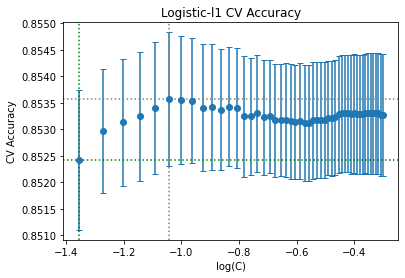

In [85]:
# Plot results of cross-validation
cv_res = logi_pipe_cv
grid = np.linspace(0.044, 0.5,50)
mean_scores = cv_res.cv_results_["mean_test_score"]
se_scores = cv_res.cv_results_["std_test_score"] / np.sqrt(5) # ! very important to divide by sqrt(# folds)
params = cv_res.cv_results_["param_classifier__C"].data

best_index = np.argmax(mean_scores)

one_se_best_param = np.min(
    grid[mean_scores >= mean_scores[best_index] - se_scores[best_index]]
)

one_se_score = mean_scores[grid == one_se_best_param][0]

# just for reference, we also plot the parameter that maximizes the cross-validated accuracy
best_param = cv_res.best_params_["classifier__C"] 
best_score = cv_res.best_score_

plt.errorbar(x=np.log10(grid), y=mean_scores, yerr=se_scores, fmt="o", capsize=3)

plt.axvline(
    np.log10(best_param), ls="dotted", color="grey"
)  # vertical line at the parameter value yielding highest accuracty
plt.axhline(
    best_score, ls="dotted", color="grey"
)  # horizontal line at highest accuracy
plt.axvline(
    np.log10(one_se_best_param), ls="dotted", color="green"
)  # vertical line at the parameter corresponding to 1-se
plt.axhline(
    one_se_score, ls="dotted", color="green"
)  # horizontal line at corresponding to 1-se parameter

plt.title("Logistic-l1 CV Accuracy")
plt.xlabel("log(C)")
plt.ylabel("CV Accuracy")
plt.show()

In [86]:
one_se_best_param

0.044

In [87]:
best_param

0.09053061224489795

In [88]:
clf.set_params(classifier__C=one_se_best_param)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['occ_code_level2', 'age',
                                                   'stock_dividends',
                                                   'wage_per_hour',
                                                   'capital_losses',
                                                   'own_or_self',
                                                   'ind_code_level2',
                                                   'capital_gains',
                                                   'weeks_worked', 'num_emp',
                                                   'vet_benefits']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_ca...
                                                   'class_worker', 'mig_same',
                                                   'unemp_reason',
                                                   'state_prev_res', 'race',
                                                   'country_mother', 'sex',
                                                   'ind_code_level1',
                                                   'citizenship',
                                                   'union_member',
                                                   'fam_under_18',
                                                   'marital_stat',
                                                   'region_prev_res',
                                                   'mig_chg_reg',
                                                   'country_father',
                                                   'occ_code_level1',
                                                   'full_or_part_emp',
                                                   'det_hh_fam_stat'])])),
                ('classifier',
                 LogisticRegression(C=0.044, penalty='l1', random_state=10,
                                    solver='saga', tol=0.1))])

In [89]:
clf.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['occ_code_level2', 'age',
                                                   'stock_dividends',
                                                   'wage_per_hour',
                                                   'capital_losses',
                                                   'own_or_self',
                                                   'ind_code_level2',
                                                   'capital_gains',
                                                   'weeks_worked', 'num_emp',
                                                   'vet_benefits']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_ca...
                                                   'class_worker', 'mig_same',
                                                   'unemp_reason',
                                                   'state_prev_res', 'race',
                                                   'country_mother', 'sex',
                                                   'ind_code_level1',
                                                   'citizenship',
                                                   'union_member',
                                                   'fam_under_18',
                                                   'marital_stat',
                                                   'region_prev_res',
                                                   'mig_chg_reg',
                                                   'country_father',
                                                   'occ_code_level1',
                                                   'full_or_part_emp',
                                                   'det_hh_fam_stat'])])),
                ('classifier',
                 LogisticRegression(C=0.044, penalty='l1', random_state=10,
                                    solver='saga', tol=0.1))])

In [90]:
y_pred_train = clf.predict(X)
acc = accuracy_score(y, y_pred_train)
print("Logistic using C = 0.044306214575838825, penalty='l1', random_state=10,solver='saga', tol=0.1 =  --- Accuracy on training:", acc)

Logistic using C = 0.044306214575838825, penalty='l1', random_state=10,solver='saga', tol=0.1 =  --- Accuracy on training: 0.8541578918453678
